In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize

In [7]:
dataframe = pd.read_csv("/Users/migherize/SourceTree/Insights_chess/src/Data_enginner/output/Cluster.csv")


In [8]:
dataframe.head()

,Jugador,Partidas,Victoria Blancas,Tablas Blancas,Perdidas Blancas,Victorias Negras,Tablas Negras,Perdidas Negras
0,danielbarreto,17113,4769,283,3713,4548,290,3510
1,jhoseim_torres,20,1,0,8,0,1,10
2,mherize,4060,1063,96,899,1042,99,861
3,rirr2020,894,205,5,266,179,5,234
4,juandv12,2847,655,88,687,678,57,682


In [9]:
data = dataframe.set_index('Jugador')

In [10]:
data

,Partidas,Victoria Blancas,Tablas Blancas,Perdidas Blancas,Victorias Negras,Tablas Negras,Perdidas Negras
Jugador,,,,,,,
danielbarreto,17113,4769,283,3713,4548,290,3510
jhoseim_torres,20,1,0,8,0,1,10
mherize,4060,1063,96,899,1042,99,861
rirr2020,894,205,5,266,179,5,234
juandv12,2847,655,88,687,678,57,682
...,...,...,...,...,...,...,...
ghkeiven,255,42,5,88,37,3,80
rjpc,784,132,14,254,123,15,246
jacksilany,467,102,4,149,78,14,120


In [11]:
data_escaled = normalize(data)
data_escaled = pd.DataFrame(data_escaled,columns=data.columns)
data_escaled.head()
data_escaled = data

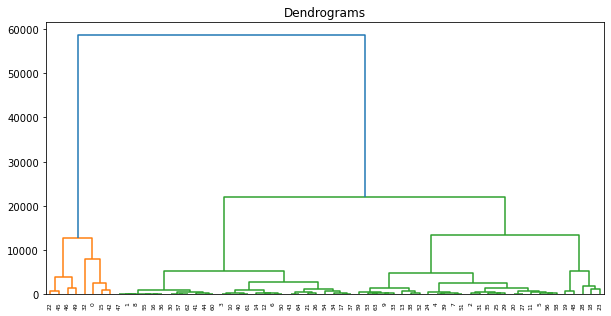

In [22]:
plt.figure(figsize=(10,5))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_escaled,method="ward"))

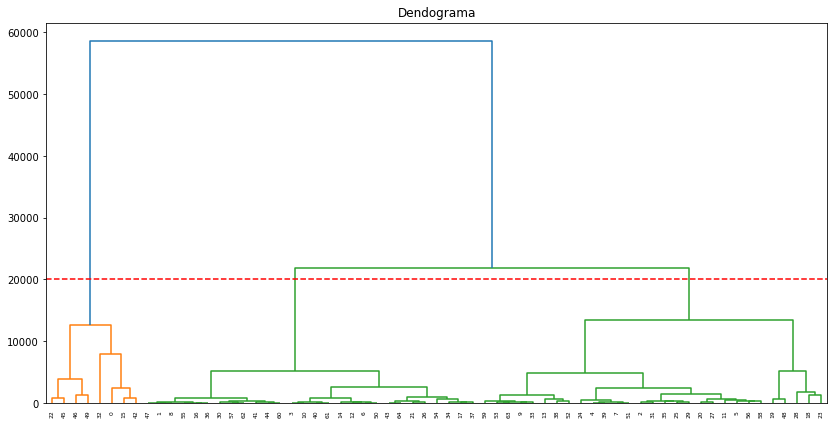

In [26]:
plt.figure(figsize=(14,7))
plt.title("Dendograma")
dend = shc.dendrogram(shc.linkage(data_escaled,method="ward"))
plt.axhline(y=20000,color='r',linestyle='--')
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
predict = cluster.fit_predict(data_escaled)
print(len(predict))

65


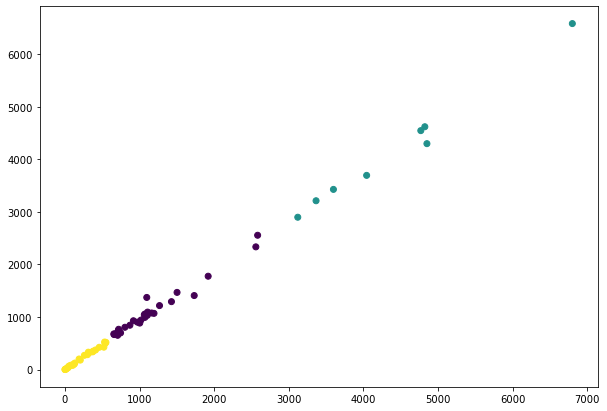

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(data_escaled['Victoria Blancas'],data_escaled['Victorias Negras'],c=cluster.labels_)

In [18]:
bank_cust = data_escaled.reset_index()
clusterDF = pd.DataFrame(predict)

In [19]:
clusterDF.columns = ['Cluster_predicted']
combineDF = pd.concat([bank_cust,clusterDF],axis = 1).reset_index()
combineDF = combineDF.drop(['index'],axis=1)

In [20]:
combineDF

,Jugador,Partidas,Victoria Blancas,Tablas Blancas,Perdidas Blancas,Victorias Negras,Tablas Negras,Perdidas Negras,Cluster_predicted
0,danielbarreto,17113,4769,283,3713,4548,290,3510,1
1,jhoseim_torres,20,1,0,8,0,1,10,2
2,mherize,4060,1063,96,899,1042,99,861,0
3,rirr2020,894,205,5,266,179,5,234,2
4,juandv12,2847,655,88,687,678,57,682,0
...,...,...,...,...,...,...,...,...,...
60,ghkeiven,255,42,5,88,37,3,80,2
61,rjpc,784,132,14,254,123,15,246,2
62,jacksilany,467,102,4,149,78,14,120,2
63,moisesbastidas7822,4542,1103,148,1107,1031,138,1015,0
